# Introduction to python, Session 4 

This section will briefly review some of the most key mechanics from the pandas. We will then start our introduction to graphs section using the following book "Social Network Analysis" for startups. You will want to have read the first chapters prior to this section. 

## Pandas

Read the following article. We will cover the big main features of Pandas as specified in the literature. 
https://towardsdatascience.com/6-basic-pandas-techniques-you-need-to-know-2c5725746938

### Creating a Data Frame 

From our previous sessions, we know that we will mainly be working with the data frame object in python. Data frames looks like your standard csv in terms of having data represented in terms of rows and columns. Lets focus on the example on how to import data from an external source as a data frame object. 

Lets say that we have a csv i an online location such as a github repository. we can read data from our repository by reading in the URl directly from https://raw.githubusercontent.com/DACUS1995/BIRCH-Mall-Customers-clustering/master/Mall_Customers.csv

In [1]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/DACUS1995/BIRCH-Mall-Customers-clustering/master/Mall_Customers.csv'

df = pd.read_csv(url)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The read_csv function is quite powerful. There are more parameters that you can specify that are not shown here. For example, you can deal with data that has a different delimeter than comma. Please see the following link for a full breakdown on all the different parameters this function can take. Practically you will most likley use many of these extra parameters for reading in data. 

If your data is in a local file on your machine, then replace url with the destination path and finally if your data is already inside your jupter environment, you can just call on your file by name. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Once we have a dataframe in our enviroment, then another key mechanic we should know how to do is to subset data by column subset. Lets say I only want the CustomerID and Annual Income column, then I would subset as follows:

In [7]:
df['Annual Income (k$)'].head()

0    15
1    15
2    16
3    16
4    17
Name: Annual Income (k$), dtype: int64

We already covered how to create a brand new column using loops or some calculation, however we did not cover how to drop a column. Lets create a dummy column and then see how we can drop it. 

In [8]:
df['Dummy'] = False

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Dummy
0,1,Male,19,15,39,False
1,2,Male,21,15,81,False
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


In [9]:
df.drop('Dummy', inplace=True, axis=1)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


When we use axis=1 in the drop function, we specify that we want to drop labels from the main index. Inplace=True preserves the overall data structure and labels. Refer to the following documentation or a full breakdown of the other functions within pandas https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html

# Introduction to Elements of Graphs 

This next session assumes that you at least covered chapters 1 through 3 in the Social Network Analysis book. We will gloss over chaptr one since it mostly deals with the motivation behind graphs. 

## What are graphs? 

Graphs are essentially abstract mathematical structures that capture relationships, connections, networks, or any related construct. The branch of mathematics called "Graph" theory allows us to quantify and measure these constructs and of course with the rise of open source software, we can analyze constructs far more complex than the basic examples we will go over today. Chapter 1 of the social network anaysis book goes into more detail and examples regarding the motivation behind graphs. 

How are graphs actually represented? We consider a graph G to be a collection of edges E and verticies V. In other words, we consider some graph to be made of nodes which could be connected to other nodes. For example, a node could represent a person and each person can be connected because they have some sort of relationship. A relationship between people (nodes) can be anything like a linkedin connection or retweet. 

There are two main types of graphs although one is more common than the other. 

* 1 Mode Model: Systems with only ONE type of node 

* 2 Mode Model: Systems with TWO types of nodes (can be extended to multimodal) 

As a conceptual check, what are some scenerios that can be modeled in a 1 or 2 mode system? (think of nodes and relationships between nodes) 

How exactly do we evaluate graphs? 
Of course, a lot of the formulas and methods to evaluate graphs can be done by hand including drawing the actual graphs. What happens when we have thousands of nodes and connections? Doing things by hand is no longer an option so how do graphs get analyzed? 

* One option is to translate a graph into an adjacency matrix. The problem with adjency matricies is that they take up a lot of memory especially for larger networks. Lets see what an adjaceny matrix looks like. 

* The better option is to create an edge to node list similar to an (x,y) table where each x, y pair defines an edge. 

Lets generate a simple graph example with three nodes A,B,C and D. i am going to define edges randomly between the four nodes. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes = ['A','B','C','D']
G.add_nodes_from(nodes)

edges = [('A','C'),('A','B'),('B','D'),('A','D'),('C','D')]

G.add_edges_from(edges)

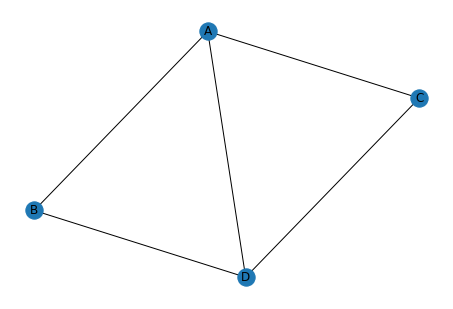

In [20]:
nx.draw(G, with_labels = True)
plt.show()

## How do we represent the above graphs? 

The first thing we need to consider is that the matrix is always going to be m x m, meaning the number or rows and columns are the same. The number of rows and columns are dependent on the number of nodes. In our case we will have a matix with four rows and four columns where rows go A,B, C, and D from left to right and columns go from A, B, C, and D from top to bottom. 

$\begin{matrix}  & A & B & C & D \\ A & 0 & 1 & 1 & 1 \\ B & 1 & 0 & 0 & 1 \\ C & 1 & 0 & 0 & 1 \\ D & 1 & 1 & 1 & 0 \end{matrix}$

We place a 1 if there exists an edge between ith entry by row and jth entry by column, otherwise we place a zero. If a node has a self loop (meaning node A goes to node A) then we count that as an edge as well. 

The other way we can represent graph systems is in an edge to edge Adjacency list. This method is much better mainly because it is database friendly and takes up much less space. A good benefit of represeting graphs in this form is that custom graphs can be prepped by using SQL. The list acts like a data frame where it has three columns called from, to, and value. Value is optional and allows you to assign a weight to each edge. 

$\begin{matrix} to & from\quad  & weight(optional) \\ A & B &  \\ A & C &  \\ A & D &  \\ B & A &  \\ B & D &  \\ C & A &  \\ C & D &  \\ D & A &  \\ D & B &  \\ D & C &  \end{matrix}$

## What are some features of graphs?

Each graph has its own collection of descriptive statistics that give us useful information about our graphs. The first isthe degree. The degree tells us the number of edges, including self loops, connected to some node. In our example, lets look at node A. Node A has three connections, therefore the degree of node A is three. Lets print out the degrees of all the nodes. While this is a handy feature for small graphs, if we have millions of nodes, we do not want to print out the degree for those millions of nodes. There are other metrics we can consider. 


In [21]:
nx.degree(G)

DegreeView({'A': 3, 'B': 2, 'C': 2, 'D': 3})

## Graph Diameter 

The diameter of a graph tells us the greater distance between any pair of nodes. To compute the diameter, we need to we need to find the shortest path between any pair of nodes. The greatest length of any one of these paths is the diameter. 

In [22]:
nx.diameter(G)

2

In our example, the diameter is 2, meaning that the greatest distance between any paid of nodes in our graph is 2. How exactly is distance between nodes calculated? Distance is Calculated by summing up the number of shortest paths for each node pair. For example, the distance between node A and B is 1 because there is only 1 short path to go from A to B. The distance between B to C is 2. Even though B is not connected to C, we can traverse the graph link by link and to get from B to C, it takes exactly two paths. There are two algorithms that crawl every possible path for each node pair. This is all built into the nx.diameter function from the networkkx package.  

## Graph Density 

The graph density is a measure of how complete a graph is. By definition a complete graph is a graph where every pair of nodes is connected by an edge. For a single mode graph, the density runs ona 0 to 1 scale where 0 means no nodes have edges and 1 means every node has an edge. For multi-mode graphs, the density can exceed 1. The formula is show below. n stands for number of nodes and e stands for number of edges. In our example, we can see that there is no connection between B to C. 

$D=\frac{2e}{n(n-1)}$

In [23]:
nx.density(G)

0.8333333333333334

## Standard Metrics 

Standard metrics are basic descriptives that we can pull from a graph such as the number of nodes and the number of edges.

In [27]:
print("The Number of Nodes: ", nx.number_of_nodes(G))
print("The Number of Edges: ",  nx.number_of_edges(G))

The Number of Nodes:  4
The Number of Edges:  5


## Next Time 

For next time, we will be taking a deeper dive into into Graph traversing and chapter three of the social network analysis book. Please read that chapter in the meantime. 

## Homework 

You will be given a simple graph K. Your job is to find the following using pencil and paper only. You may use code to check your answers: 

* How many edges are in this graph?

* How many nodes are in this graph?

* What is the node with the highest degree? 

* What is the diameter of graph k? 

* Compute the graph density 

The next part of your homework is to go through this numpy tutorial. https://numpy.org/devdocs/user/quickstart.html


In [6]:
K = nx.Graph()

nodes = ['A','B','C','D','E','F']
K.add_nodes_from(nodes)

edges = [('A','C'),('A','B'),('B','D'),('A','D'),('C','D'),('A','F'),('E','F'),('E','D'),('A','E')]

K.add_edges_from(edges)

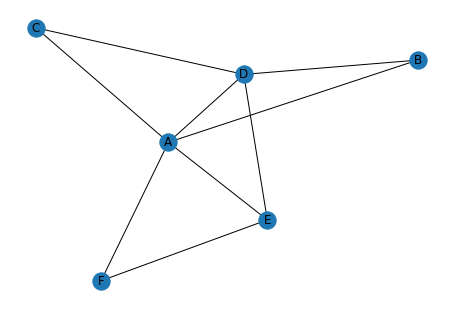

In [7]:
nx.draw(K, with_labels = True)
plt.show()